In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np
from scipy.stats import sem

In [2]:
#set variables for data files
mouse_metadata = os.path.join("Resources", "mouse_metadata.csv")
study_files = os.path.join("Resources", "study_results.csv")

#read the csv files
mouse_metadata = pd.read_csv(mouse_metadata)
study_files = pd.read_csv(study_files)
mouse_metadata.head()

#combine the data sets into one
data_df = pd.merge(mouse_metadata, study_files, on="Mouse ID")

In [3]:
#testing the counts and various numbers so I can check against my functions below
#keep for now, delete for final output

drug_types = data_df["Drug Regimen"].unique()
print(drug_types)

drug_counts = data_df["Drug Regimen"].value_counts()
print(drug_counts)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64


In [4]:
#Summary Statistics
#generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen

#generate stats
tumor_mean = data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance = data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_std = data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem = data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

#place into a summary table
tumor_vol_stats_df = pd.DataFrame({"Mean": tumor_mean,
                                 "Median": tumor_median,
                                 "Variance": tumor_variance,
                                 "Standard Deviant": tumor_std,
                                 "Standard Error": tumor_sem})
tumor_vol_stats_df

,Mean,Median,Variance,Standard Deviant,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


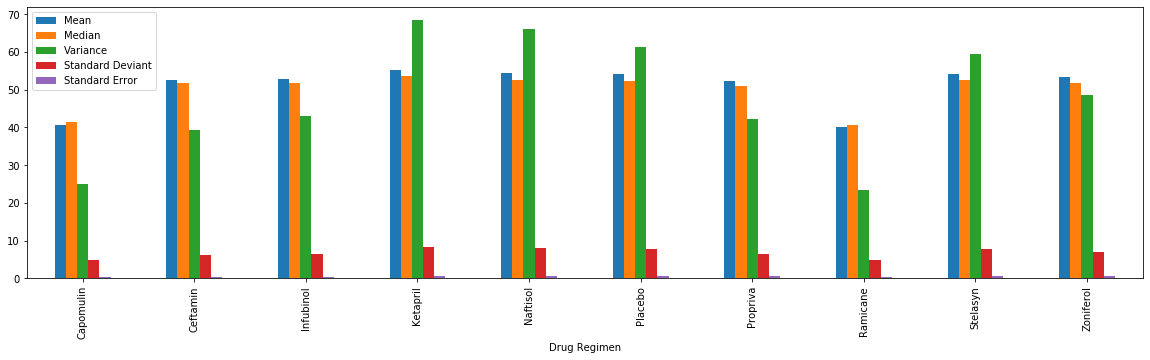

In [19]:
#use Pandas to create a bar plot with the above data
multi_stats = tumor_vol_stats_df.plot(kind="bar", figsize=(20,5))

plt.show()

In [ ]:
#use Matplotlib to create a bar plot with the same data
